## Choose one random star to analyze the lithium line (6707.926 Å) in P112 using Korg

In [1]:
from juliacall import Main as jl
jl.seval("using Korg")
Korg = jl.Korg

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
import matplotlib.pyplot as plt
import time
import numpy as np
from astropy.io import fits
import os
import pandas as pd

In [3]:
# path of the FITS file
P112_folder = "P112_data"
P112_target = "ADP.2024-01-04T15:02:12.615.fits"
filepath = os.path.join(P112_folder, P112_target)

# open the FITS file
hdul = fits.open(filepath)

In [4]:
# print FITS file info
#hdul.info()

In [5]:
P112_primary_header = hdul[0].header
P112_primary_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2024-01-04T10:23:42' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
OBJECT  = 'UCAC4 202-005918'   / Original target.                               
RA      =            81.648512 / [deg] Spectroscopic target position (J2000)    
DEC     =            -49.78567 / [deg] Spectroscopic target position (J2000)    
EXPTIME =                 300. / [s] Total integration time per pixel           
MJD-OBS =       60284.018163

### Obtaining the necessary data

In [6]:
# Original target
P112object_name = P112_primary_header.get("OBJECT") # star name
print(f'Object Name: {P112object_name}')

Object Name: UCAC4 202-005918


In [7]:
# measured data columns
P112_data = hdul[1].data
P112_data

FITS_rec([([3772.002744  , 3772.00903481, 3772.01532563, ..., 7899.95274887, 7899.96592413, 7899.97909941], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ..., 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], [16384, 16384, 16384, ..., 16384, 16384, 16384], [           nan,            nan,            nan, ...,            nan,            nan,            nan], [3770.93140055, 3770.93768973, 3770.94397892, ..., 7897.78011514, 7897.79328684, 7897.80645856], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [  0.        ,   0.        ,   0.        , ...,   0.        ,   0.        ,   0.        ], [16384, 16384, 16384, ..., 16384, 16384, 16384], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ..., 0.00000000e+00, 0.0

In [8]:
# given wavelength and flux
wavelength = P112_data["WAVE"] # Wavelength in vacuum (Å)
air_wavelength = P112_data["WAVE_AIR"]
flux = P112_data["FLUX"] 
error = P112_data["ERR_CAL_SKYSUB"] # Corresponding uncertainty
#snr = P112_data["SNR"]  # Signal-to-noise ratio

### Flux Measurements

In [9]:
print(flux.shape)
print("Min:", np.min(flux))
print("Max:", np.max(flux))
print("Mean:", np.mean(flux))
print("Standard Deviation:", np.std(flux))

(1, 443262)
Min: -2.504302323906054e-12
Max: 3.7456690368842945e-12
Mean: 2.2096346282860586e-14
Standard Deviation: 3.298708638896064e-14


In [10]:
flux_1d = flux.flatten() # convert from 2D to 1D array
flux_series = pd.Series(flux_1d)
# first and last five 
print(flux_series.head())
print(flux_series.tail())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64
443257    0.0
443258    0.0
443259    0.0
443260    0.0
443261    0.0
dtype: float64


### Wavelength Measurements

In [11]:
print(wavelength.shape)
print("Min:", np.min(wavelength))
print("Max:", np.max(wavelength))
print("Mean:", np.mean(wavelength))
print("Standard Deviation:", np.std(wavelength))

(1, 443262)
Min: 3772.0027440048325
Max: 7899.979099406373
Mean: 5583.976082865098
Standard Deviation: 1186.2775574504296


In [12]:
wavelength_1d = wavelength.flatten()
wavelength_series = pd.Series(wavelength_1d)
# first and last five 
print(wavelength_series.head())
print(wavelength_series.tail())

0    3772.002744
1    3772.009035
2    3772.015326
3    3772.021616
4    3772.027907
dtype: float64
443257    7899.926398
443258    7899.939574
443259    7899.952749
443260    7899.965924
443261    7899.979099
dtype: float64


### Air Wavelength Measurements

In [13]:
print(air_wavelength.shape)
print("Min:", np.min(air_wavelength))
print("Max:", np.max(air_wavelength))
print("Mean:", np.mean(air_wavelength))
print("Standard Deviation:", np.std(air_wavelength))

(1, 443262)
Min: 3770.9314005522947
Max: 7897.806458558487
Mean: 5582.424503361965
Standard Deviation: 1185.9608867895413


In [14]:
air_wavelength_1d = air_wavelength.flatten()
air_wavelength_series = pd.Series(air_wavelength_1d)
# first and last five 
print(air_wavelength_series.head())
print(air_wavelength_series.tail())

0    3770.931401
1    3770.937690
2    3770.943979
3    3770.950268
4    3770.956557
dtype: float64
443257    7897.753772
443258    7897.766943
443259    7897.780115
443260    7897.793287
443261    7897.806459
dtype: float64


### Error Measurements

In [15]:
print(error.shape)
print("Min:", np.min(error))
print("Max:", np.max(error))
print("Mean:", np.mean(error))
print("Standard Deviation:", np.std(error))

(1, 443262)
Min: 0.0
Max: 1.4746710288925036e-12
Mean: 4.7845241827303524e-15
Standard Deviation: 2.998916123332227e-14


In [16]:
error_1d = error.flatten()
error_series = pd.Series(error_1d)
# first and last five 
print(error_series.head())
print(error_series.tail())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64
443257    0.0
443258    0.0
443259    0.0
443260    0.0
443261    0.0
dtype: float64


---

In [17]:
# Required data
print("Wavelength measurements [nm]:", P112_data['WAVE'])
print("Air Wavelength measurements [nm]:", P112_data['WAVE_AIR'])
print("Flux measurements:", P112_data['FLUX'])

Wavelength measurements [nm]: [[3772.002744   3772.00903481 3772.01532563 ... 7899.95274887
  7899.96592413 7899.97909941]]
Air Wavelength measurements [nm]: [[3770.93140055 3770.93768973 3770.94397892 ... 7897.78011514
  7897.79328684 7897.80645856]]
Flux measurements: [[0. 0. 0. ... 0. 0. 0.]]


In [18]:
print(f"Wavelength range: {wavelength.min()} Å - {wavelength.max()} Å")
print(f"Number of data points: {len(wavelength)}")

Wavelength range: 3772.0027440048325 Å - 7899.979099406373 Å
Number of data points: 1


# Spectrum Analysis

## I. Synthesizing a spectrum

In [19]:
# given vaccuum wavelength of lithium line
li_wavelength = 6707.926 # Å

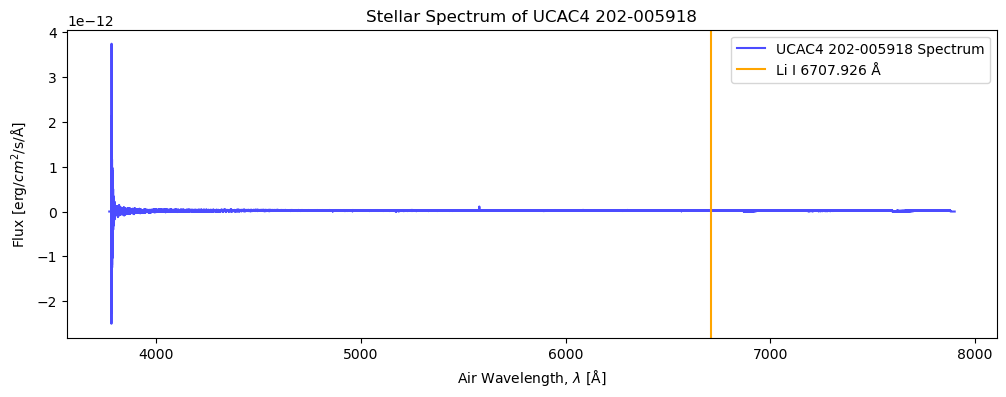

In [20]:
plt.figure(figsize = (12, 4))
plt.plot(wavelength_1d, flux_1d, color = 'blue', label = f"{P112object_name} Spectrum", alpha=0.7)
plt.axvline(li_wavelength, color = 'orange', linestyle = '-', label = 'Li I 6707.926 Å')
#plt.xlim(4000, 8000) # wavelength range of interest
plt.xlabel(r"Air Wavelength, $\lambda$ [Å]")
plt.ylabel(r"Flux [erg/$cm^{2}$/s/Å]")
plt.title(f"Stellar Spectrum of {P112object_name}")
plt.legend()
plt.savefig('ADP.2024-01-04T15:02:12.615_rawstellarspectrum.png')
plt.show();

## Shift the lithium absorption in rest frame

**The Doppler Shift Formula**
$$\lambda_{shifted} = \lambda_{rest} * (1 + \frac{v}{c})$$

where **v** is the radial velocity of the star and **c** is the speed of light (3e8 m/s).

In [21]:
c = 299792.458 # [k]

# find observed lithium line
li_observed_index = np.argmin(flux_1d)  # approximate method
li_observed_wavelength = wavelength_1d[li_observed_index]

#### Notes for the Radial Velocity

It seems like the observed wavelength of the Li I (neutral lithium) absorption line is **less than** vaccuum wavelength (blueshift) because the radial velocity is negative.

- Negative radial velocity means that the red giant is **moving towards** an observer

In [22]:
# WRONG! 
# compute radial velocity (v)
rv = c * ((li_observed_wavelength / li_wavelength) - 1)
print(f"Radial Velocity: {rv:.2f} km/s")

Radial Velocity: -130735.86 km/s


In [23]:
# CORRECT RV
rv_value = P112_primary_header['HIERARCH ESO QC CCF RV']

**Applying the Doppler shift correction**

It is to remove the radial velocity effect and bring the synthesized spectrum back to the rest frame (orange virtual line) for proper spectral analysis.


In [24]:
wavelength_shifted = wavelength_1d / (1 + rv_value / c)

### Always use Air Wavelength to Plot a Spectrum of Interest

**Difference**

Vacuum - lab-perfect condition value

Air - common for spectral analysis

In [25]:
air_wavelength_shifted = air_wavelength_1d / (1 + rv_value / c)

## II. Synthesizing a spectrum

* Aligned orange line with the doppler shifted spectrum

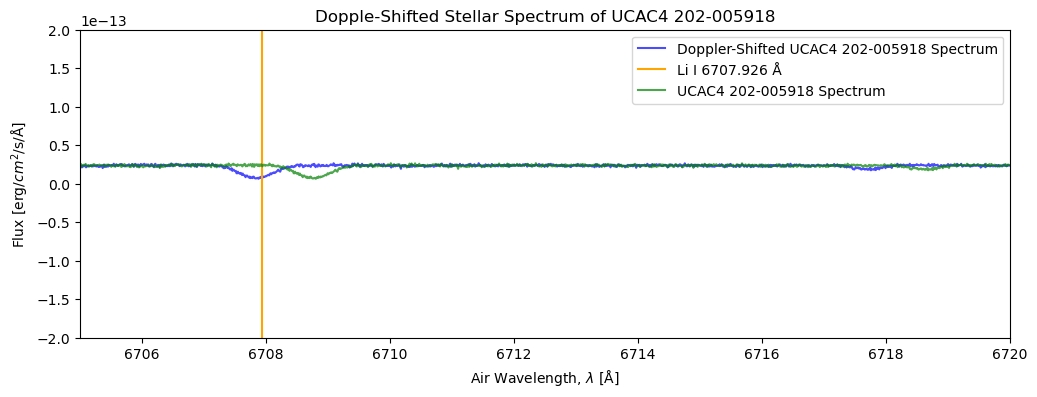

In [26]:
plt.figure(figsize = (12, 4))
plt.plot(air_wavelength_shifted, flux_1d, color = 'blue', label = f"Doppler-Shifted {P112object_name} Spectrum", alpha=0.7)
#plt.plot(wavelength_1d, flux_1d, color = 'green', label = f"{P112object_name} Spectrum", alpha=0.7)
plt.axvline(li_wavelength, color = 'orange', linestyle = '-', label = 'Li I 6707.926 Å')
plt.plot(air_wavelength_1d, flux_1d, color = 'green', label = f"{P112object_name} Spectrum", alpha=0.7)

plt.xlim(6705, 6720) # wavelength range of interest
plt.ylim(-2e-13, 2e-13)
plt.xlabel(r"Air Wavelength, $\lambda$ [Å]")
plt.ylabel(r"Flux [erg/$cm^{2}$/s/Å]")
plt.title(f"Dopple-Shifted Stellar Spectrum of {P112object_name}")
plt.legend()
#plt.savefig('ADP.2024-01-04T15:02:12.615_shiftedstellarspectrum.png')
plt.show();

## Plotting the Flux Error

Replace ```flux_1d``` with ``ERR`` for the y-value

### Flux Error Measurements

In [27]:
flux_err = P112_data["ERR"]

In [28]:
print(flux_err.shape)
print("Min:", np.min(flux_err))
print("Max:", np.max(flux_err))
print("Mean:", np.mean(flux_err))
print("Standard Deviation:", np.std(flux_err))

(1, 443262)
Min: 0.0
Max: 1.4746710288925036e-12
Mean: 4.7845241827303524e-15
Standard Deviation: 2.998916123332227e-14


In [29]:
flux_err_1d = flux_err.flatten()
flux_err_series = pd.Series(flux_err_1d)
# first and last five 
print(flux_err_series.head())
print(flux_err_series.tail())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64
443257    0.0
443258    0.0
443259    0.0
443260    0.0
443261    0.0
dtype: float64


### Why plot flux error here?

The spectrum shouldn't be flat, but it is always good to know where the air wavelength and spectrum align.

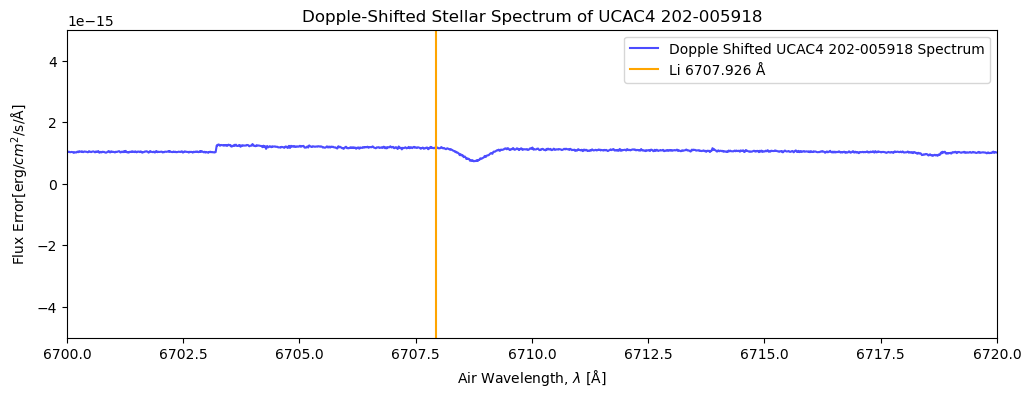

In [30]:
zoom_range = 4 # adjust accordingly

plt.figure(figsize = (12, 4))
plt.plot(air_wavelength_1d, flux_err_1d, color = 'blue', label = f"Dopple Shifted {P112object_name} Spectrum", alpha=0.7)
plt.axvline(li_wavelength, color = 'orange', linestyle = '-', label = 'Li 6707.926 Å')
#plt.xlim(li_wavelength - zoom_range, li_wavelength + zoom_range)
plt.xlim(6700, 6720) # wavelength range of interest
plt.ylim(-0.5e-14, 0.5e-14) # sent
plt.xlabel(r"Air Wavelength, $\lambda$ [Å]")
plt.ylabel(r"Flux Error[erg/$cm^{2}$/s/Å]")
plt.title(f"Dopple-Shifted Stellar Spectrum of {P112object_name}")
plt.legend()
#plt.savefig('ADP.2024-01-04T15:02:12.615_shiftedstellarspectrum.png')
plt.show();

### Now, plotting Air Wavelength

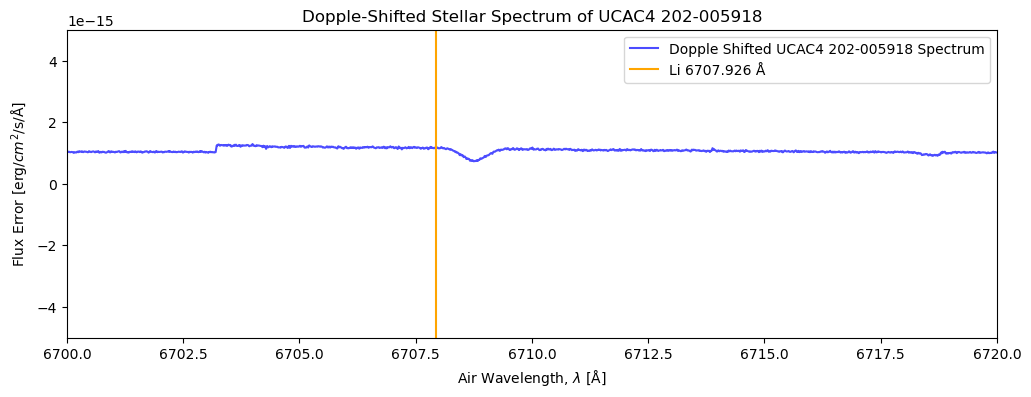

In [31]:
plt.figure(figsize = (12, 4))
plt.plot(air_wavelength_1d, flux_err_1d, color = 'blue', label = f"Dopple Shifted {P112object_name} Spectrum", alpha=0.7)
plt.axvline(li_wavelength, color = 'orange', linestyle = '-', label = 'Li 6707.926 Å')
#plt.xlim(li_wavelength - zoom_range, li_wavelength + zoom_range)
plt.xlim(6700, 6720) # wavelength range of interest
plt.ylim(-0.5e-14, 0.5e-14) # sent
plt.xlabel(r"Air Wavelength, $\lambda$ [Å]")
plt.ylabel(r"Flux Error [erg/$cm^{2}$/s/Å]")
plt.title(f"Dopple-Shifted Stellar Spectrum of {P112object_name}")
plt.legend()
#plt.savefig('ADP.2024-01-04T15:02:12.615_shiftedstellarspectrum.png')
plt.show();

----

## Specifying abundances

#### Read in GALAH linelist

The GALAH linelist should overlap with ESPRESSO’s spectral range. ESPRESSO covers approximately 3800–7880 Å (for 1-UT mode) and 3800–6800 Å (for 4-UT mode). Since GALAH’s line list spans 4713–7887 Å, you’ll get a good overlap, especially in the red and optical regions

In [32]:
# loading the GALAH DR3 linelist
galah_linelist = Korg.get_GALAH_DR3_linelist() # paper uses GALAH DR3

In [33]:
galah_linelist # vector (array) of Korg.Line structs

307000-element Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}:
 OTi 4676.310547 Å (log gf = -0.91, χ = 0.32 eV)
 OTi 4676.31543 Å (log gf = -1.17, χ = 0.3 eV)
 OTi 4676.316406 Å (log gf = -1.01, χ = 0.59 eV)
 HSi 4676.318848 Å (log gf = -3.21, χ = 1.49 eV)
 Rh I 4676.330566 Å (log gf = -1.78, χ = 0.71 eV)
 Ni I 4676.331055 Å (log gf = -3.36, χ = 3.46 eV)
 OTi 4676.334473 Å (log gf = -0.91, χ = 0.34 eV)
 OTi 4676.336426 Å (log gf = -1.24, χ = 0.26 eV)
 OZr 4676.339844 Å (log gf = 0.37, χ = 0.35 eV)
 OTi 4676.341797 Å (log gf = -0.13, χ = 1.19 eV)
 ⋮
 OTi 7927.113281 Å (log gf = -1.34, χ = 0.65 eV)
 OTi 7927.121094 Å (log gf = 0.09, χ = 0.73 eV)
 OTi 7927.128906 Å (log gf = -0.82, χ = 0.94 eV)
 OTi 7927.133301 Å (log gf = -1.32, χ = 0.7 eV)
 OTi 7927.13623 Å (log gf = -1.97, χ = 0.23 eV)
 Nd II 7927.143066 Å (log gf = -1.74, χ = 1.09 eV)
 OTi 7927.15625 Å (log gf = -1.09, χ = 0.59 eV)
 OTi 7927.15918 Å (log gf = -0.2, χ = 0.69 eV)
 OTi 7927.163086 Å (log gf = -2.

In [34]:
galah_linelist[:5] # first 5 values

5-element view(::Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}, 1:1:5) with eltype Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}:
 OTi 4676.310547 Å (log gf = -0.91, χ = 0.32 eV)
 OTi 4676.31543 Å (log gf = -1.17, χ = 0.3 eV)
 OTi 4676.316406 Å (log gf = -1.01, χ = 0.59 eV)
 HSi 4676.318848 Å (log gf = -3.21, χ = 1.49 eV)
 Rh I 4676.330566 Å (log gf = -1.78, χ = 0.71 eV)

In [35]:
galah_linelist[-5:] # first 5 values

5-element view(::Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}, 306996:1:307000) with eltype Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}:
 OTi 7927.13623 Å (log gf = -1.97, χ = 0.23 eV)
 Nd II 7927.143066 Å (log gf = -1.74, χ = 1.09 eV)
 OTi 7927.15625 Å (log gf = -1.09, χ = 0.59 eV)
 OTi 7927.15918 Å (log gf = -0.2, χ = 0.69 eV)
 OTi 7927.163086 Å (log gf = -2.18, χ = 0.26 eV)

### Converting from a Custom Type Array ```juliacall.VectorValue``` in Julia to Pandas

In [36]:
type(galah_linelist) 

juliacall.VectorValue

In [37]:
# Convert Julia vector to a Python list
data = list(galah_linelist)

In [38]:
# Get field names from the Julia struct
field_names = jl.fieldnames(jl.typeof(galah_linelist[0]))
field_names

(Julia: :wl,
 Julia: :log_gf,
 Julia: :species,
 Julia: :E_lower,
 Julia: :gamma_rad,
 Julia: :gamma_stark,
 Julia: :vdW)

In [39]:
df = pd.DataFrame([{f: jl.getfield(line, f) for f in jl.fieldnames(jl.typeof(line))} for line in galah_linelist])
df

,wl,log_gf,species,E_lower,gamma_rad,gamma_stark,vdW
0,0.000047,-0.909427,OTi,0.320,2.100000e+07,0.000000,"(0.0, -1.0)"
1,0.000047,-1.167670,OTi,0.303,2.100000e+07,0.000000,"(0.0, -1.0)"
2,0.000047,-1.012803,OTi,0.594,1.900001e+07,0.000000,"(0.0, -1.0)"
3,0.000047,-3.207000,HSi,1.494,1.893798e+05,0.000000,"(0.0, -1.0)"
4,0.000047,-1.780000,Rh I,0.706,5.062109e+06,0.000002,"(1.4652450202449246e-08, -1.0)"
...,...,...,...,...,...,...,...
306995,0.000079,-1.968415,OTi,0.233,2.100000e+05,0.000000,"(0.0, -1.0)"
306996,0.000079,-1.740000,Nd II,1.091,1.931561e+06,0.000003,"(1.1008881097345056e-08, -1.0)"
306997,0.000079,-1.092546,OTi,0.592,1.000000e+07,0.000000,"(0.0, -1.0)"
306998,0.000079,-0.196415,OTi,0.686,1.000000e+07,0.000000,"(0.0, -1.0)"


In [40]:
df.columns

Index([wl, log_gf, species, E_lower, gamma_rad, gamma_stark, vdW], dtype='object')

#### Programming Note

Column names might not be strings—they could be interpreted as variables instead

In [41]:
df.columns = df.columns.astype(str)
df.columns

Index(['wl', 'log_gf', 'species', 'E_lower', 'gamma_rad', 'gamma_stark',
       'vdW'],
      dtype='object')

### Extracting Copper (Cu) Lines from the GALAH DR3 linelist

#### Programming Note
```case=False``` makes it case-insensitive, ```na=False``` prevents errors with NaN values.

In [48]:
df['species'] = df['species'].astype(str)  # Convert all values to string
df[df['species'].str.contains('Cu', case = False, na = False)]

,wl,log_gf,species,E_lower,gamma_rad,gamma_stark,vdW
6879,0.000047,-0.658,Cu I,5.245,1.318256e+08,0.000003,"(2.5703948796691976e-08, -1.0)"
7872,0.000047,-1.247,Cu I,5.688,1.819702e+08,0.000004,"(2.6915337400578164e-08, -1.0)"
8567,0.000047,-0.529,Cu I,5.102,1.348963e+08,0.000003,"(2.5703948796691976e-08, -1.0)"
23026,0.000048,-0.330,Cu I,5.725,2.238723e+08,0.000004,"(2.6915337400578164e-08, -1.0)"
25056,0.000048,-1.597,Cu I,5.421,6.025599e+07,0.000003,"(2.818381693478142e-08, -1.0)"
...,...,...,...,...,...,...,...
290072,0.000078,-1.804,Cu I,7.349,2.041740e+08,0.001349,"(1.1220189470737863e-07, -1.0)"
292796,0.000078,-2.094,Cu I,7.349,1.949844e+08,0.001349,"(1.1220189470737863e-07, -1.0)"
292862,0.000078,-1.733,Cu I,7.355,1.819702e+08,0.000617,"(1.1220189470737863e-07, -1.0)"
295501,0.000078,-1.812,Cu I,7.355,2.187762e+08,0.000617,"(1.1220189470737863e-07, -1.0)"


### Reading the ```galah_linelist``` in the Pandas DataFrame

- *Species* (e.g., OTi, HSi, Rh I, Ni I)
- *Wavelength, $\lambda$* in Ångströms
- *log gf* is the oscillator strength
- *$\chi$ (chi)* is the excitation potential in eV

### Use the target's spectrum to find these values by using Korg. However, start with one element (2/11/24).

**Elements of Interest List (~30):** ‘alpha’, ‘Li’, ‘C’, ‘O’, ‘Na’, ‘Mg’, ‘Al’, ‘Si’, ‘K’, ‘Ca’, ‘Sc’,‘Sc2’, ‘Ti2’, ‘Ti’, ‘V’, ‘Cr’, ‘Cr2’, ‘Mn’, ‘f’, ‘Co’, ‘Ni’, ‘Cu’, ‘Zn’, ‘Rb’, ‘Sr’, ‘Y’, ‘Zr’, ‘Mo’, ‘Ru’, ‘Ba’, ‘La’, ‘Ce’, ‘Nd’,‘Sm’, ‘Eu’

**Note:** Maryum sent it


### Extracting Copper (Cu) Lines from ```Object Name: UCAC4 202-005918``` Spectrum

### What is the Air Wavelength of 6707.926 Å? To do this, find the Li depth at the Li line.

WRONG! Use korg to do this.

In [45]:
# find index closest to the vacuum Li wavelength (closest match)
li_index = np.argmin(np.abs(wavelength_1d - li_wavelength))

# extract flux at the Li line
li_flux = flux_1d[li_index]

# estimate the local continuum flux by averaging a small range around the line (excluding the line itself)
continuum_mask = (wavelength_1d > li_wavelength - 10) & (wavelength_1d < li_wavelength + 10)
continuum_flux = np.median(flux_1d[continuum_mask])

# compute absorption depth
lithium_depth = 1 - (li_flux / continuum_flux)
print(f"Lithium Absorption Depth at {li_wavelength:.3f} Å: {lithium_depth:.3f}")

Lithium Absorption Depth at 6707.926 Å: 0.015
